# Assignment 1: Data Import and Exploration in Python
Malhar Mahajan — **B00934337**


In [7]:
# Q1: Load the dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We imported seaborn, matplotlib, and pandas. 
Then we loaded the Titanic dataset using seaborn’s built-in `load_dataset()` function.
The dataset includes information about passengers such as age, fare, sex, class, and survival.

In [6]:
# Q2: Handle missing values

# Check which columns have missing data
titanic.isnull().sum()



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Fill or drop missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.dropna(subset=['deck'], inplace=True)

# Verify
titanic.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

0filled 'age' with the median (reduces skew for numeric data), 
filled 'embarked' with the mode (most common category), 
and dropped 'deck' since it had many missing values.


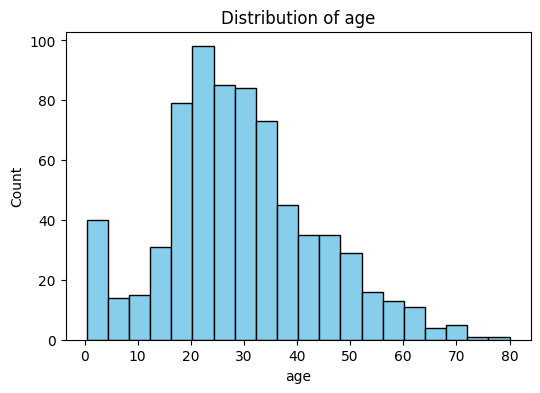

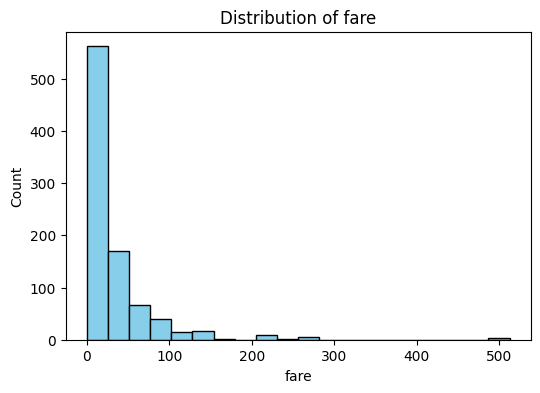

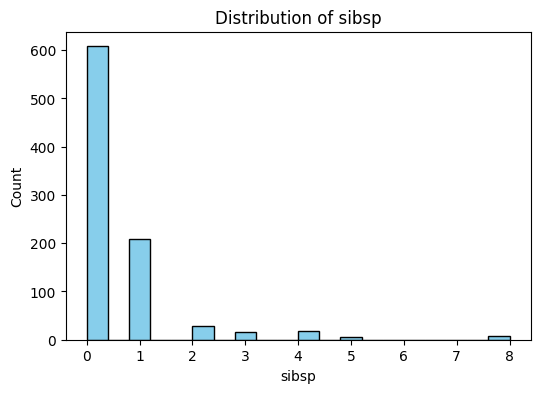

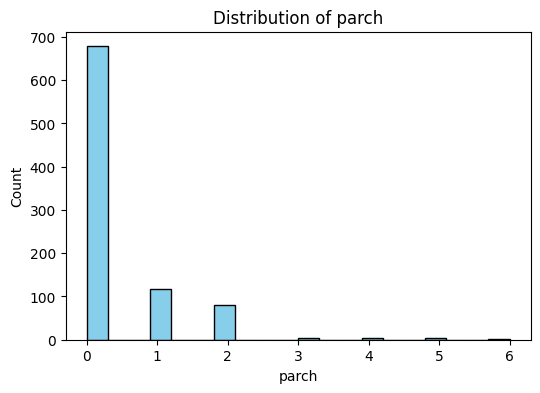

In [5]:
# Q3: Explore numeric columns using histograms
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(titanic[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


- **Age:** Most passengers were between 20–40 years old.
- **Fare:** Strongly right-skewed; only a few passengers paid very high fares.
- **SibSp:** Most had 0 siblings/spouses aboard; a few had 1–2.
- **Parch:** Similar trend to SibSp; most had no parents/children on board.


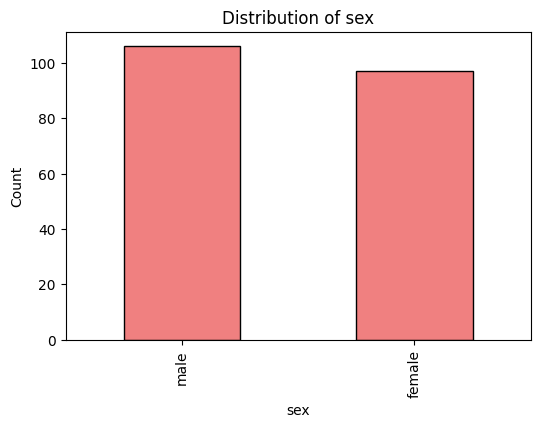

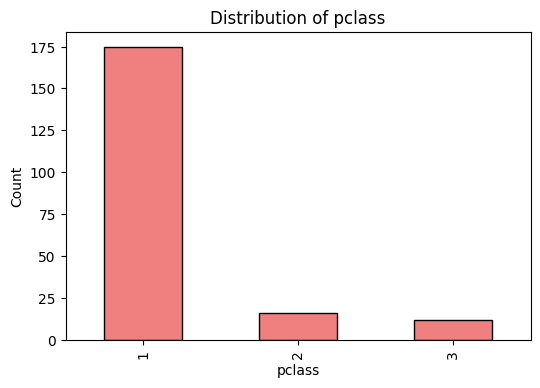

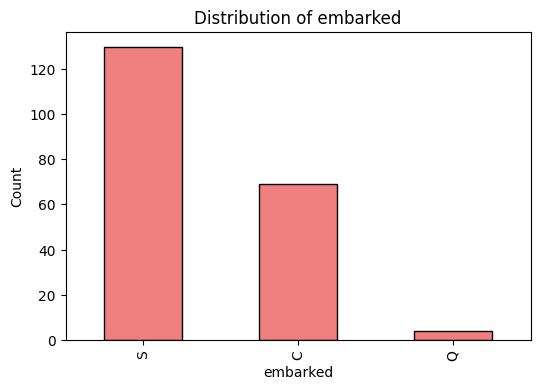

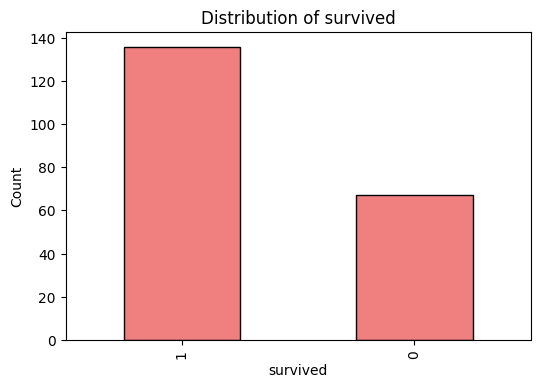

In [9]:
# Q4: Explore categorical columns using bar plots

categorical_cols = ['sex', 'pclass', 'embarked', 'survived']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    titanic[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


- **Sex:** There were more male passengers than female passengers.
- **Pclass:** Most passengers were in 3rd class.
- **Embarked:** The majority boarded at port 'S' (Southampton).
- **Survived:** Fewer people survived than those who didn’t.


C:\Users\malpr\AppData\Local\Temp\ipykernel_45132\3457159825.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


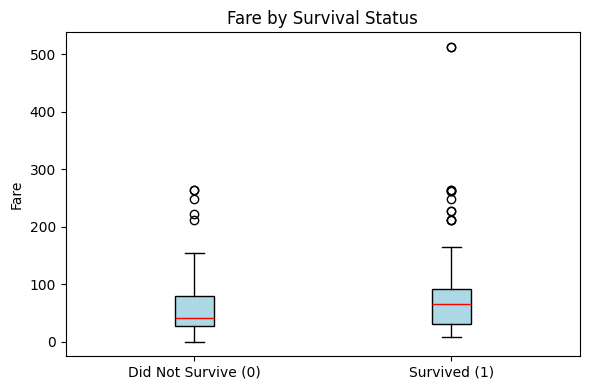

In [10]:
# Q5: Examine fare differences by survival

plt.figure(figsize=(6, 4))
plt.boxplot(
    [titanic.loc[titanic['survived'] == 0, 'fare'],
     titanic.loc[titanic['survived'] == 1, 'fare']],
    labels=['Did Not Survive (0)', 'Survived (1)'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red')
)
plt.title("Fare by Survival Status")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()


The boxplot shows that survivors generally paid higher fares. 
This suggests passengers in higher classes (who paid more) 
had a better chance of survival compared to those who paid less.


<Figure size 600x400 with 0 Axes>

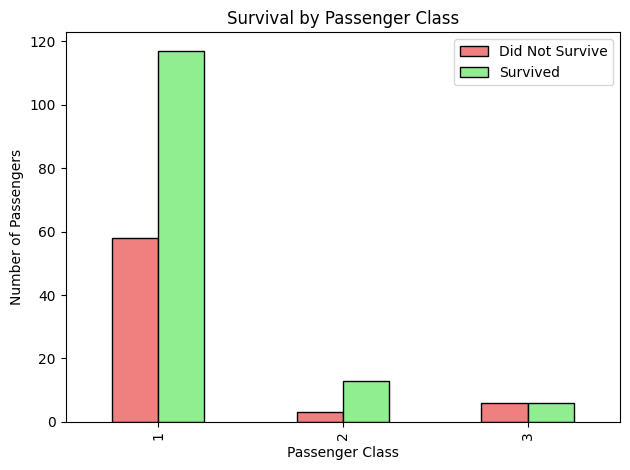

In [11]:
# Q6: Survival by passenger class

# Create a table of counts for survived vs not survived by class
survival_by_class = pd.crosstab(titanic['pclass'], titanic['survived'])

# Plot grouped bar chart
plt.figure(figsize=(6, 4))
survival_by_class.plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive", "Survived"])
plt.tight_layout()
plt.show()


The chart shows that 1st-class passengers had the highest survival rate, 
while 3rd-class passengers had the lowest. 
This highlights a clear link between passenger class and likelihood of survival.
